In [ ]:
#specify the bits to be transmitted 
a = "1"
b = "2"
#name the qubit: q0 for the top qubit and q1 for the bottom one. 
from qiskit import QuantumCircuit

protocol = QuantumCircuit(2)

#prepare e-bit used for superdense 
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

In [ ]:
#Alice's operation 
if b == "1":
    protocol.z(0)
if a == "1":
    protocol.x(0)
protocol.barrier()

In [ ]:
#bob's action 
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

protocol.draw()

In [ ]:
from qiskit_aer import AerSimulator 
from qiskit.visualization import plot_histogram

counts = AerSimulator().run(protocol).result().get_counts()
for outcome, frequency in counts.items():
    print(f"Measure{outcome} with frequency {frequency}")
plot_histogram(counts)

In [6]:
#additional qubit as a random bit generator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_a = ClassicalRegister(1, "Alice a")
Alice_b = ClassicalRegister(1, "Alice b")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_a, Alice_b)


In [7]:
#Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()


In [12]:
#use the 'randomizer' qubit twice to generate alice's bits a and b. 
test.h(rbg)
test.measure(rbg, Alice_a)
test.h(rbg)
test.measure(rbg, Alice_b)
test.barrier()

#now the protocol runs, starting with Alice's action, which depend on her bits. 
with test.if_test((Alice_b, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_a, 1), label="X"):
    test.x(ebit0)
test.barrier()

In [16]:
#Bob's actions 
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_a = ClassicalRegister(1, "Bob a")
Bob_b = ClassicalRegister(1, "Bob b")
test.add_register(Bob_b)
test.add_register(Bob_a)
test.measure(ebit1, Bob_a)
test.measure(ebit0, Bob_b)

test.draw()


CircuitError: 'register name "Bob b" already exists'

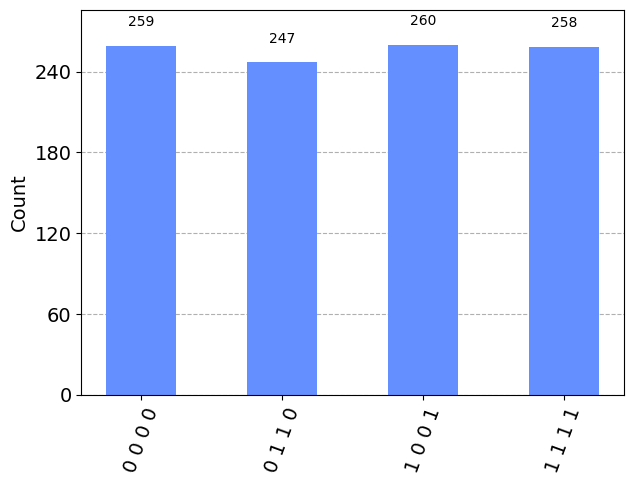

In [17]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

counts = AerSimulator().run(test).result().get_counts()
plot_histogram(counts)